# [특성 공학과 모델 규제](https://)

## [농어 데이터 준비(길이-높이-두께)](https://)


In [2]:
# pd는 관례적으로 사용하는 판다스의 별칭
# 데이터 조작 및 분석을 위한 파이썬 프로그래밍 언어 용으로 작성된 소프트웨어 라이브러리
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print("개수 = ", len(perch_full))
print(perch_full) # 길이-높이-두께

개수 =  56
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40

In [3]:
import numpy as np
perch_weight = np.array( #무게
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])
print("개수 = ", len(perch_weight))

개수 =  56




---



## [perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기](https://)


In [4]:
from sklearn.model_selection import train_test_split  #함수 train_test_split를 임포트
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42) #4개로 분리



---



# [사이킷런 변환기(transformer)](https://)
- [특성을 만들거나 전처리하기 위한 다양한 클래스를 제공](https://)
- 사이킷런의 모델 클래스에 일관된 [fit(), score(), predict()](https://) 메서드가 있음
- 변환기 클래스는 모두 fit(), [transform()](https://)메서드를 제공함




---



## [변환기(PolynomialFeatures 클래스) 사용해보기](https://)


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

#2개의 특성 2와 3으로 이루어진 샘플 하나를 적용
#훈련(fit)을 해야 변환(transform)이 가능함

#사이킷런의 일관된 api 때문에 두 단계로 나뉘어져 있음

#두 메서드를 하나로 붙인 fit_transform 메서드도 있음
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

#기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리
#서로 곱한 항을 추가(2와 3을 각기 제곱한 4와 9가 추가/ 2와 3을 곱한 6이 추가됨)

#1은 왜 추가되었을까요? - 1이 추가된 이유?
#선형 방정식 ‘무게 = a×길이 + b×높이 + c×두께 + d×1의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있음
#특성 - (길이, 높이, 두께, 1)이 됨
#사이킷런의 선형 모델은 자동으로 절편을 추가해줌(include_bias = False로 지정)

[[1. 2. 3. 4. 6. 9.]]




---



## [train_input의 변환한 데이터를 train_poly에 저장하고 이 배열의 크기를 확인해보기](https://)


In [6]:
poly = PolynomialFeatures(include_bias=False)
#poly = PolynomialFeatures(include_bias=True)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly)
print(train_poly.shape)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [7]:
#get_feature_names_out() 메서드를 호출
#9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려 줌
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
test_poly = poly.transform(test_input)
print("테스트 세트의 개수 = ", len(test_poly))
print(test_poly)

테스트 세트의 개수 =  14
[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900



---



# [다중 회귀 분석(Multiple Regression Analysis)](https://)
- 종속변수가 1개로 같지만 [독립변수가 2개 이상인 것을 의미함](https://)
- 변수의 수 및 종류에 따라 표현
>- [단순 회귀 분석 - 독립변수가 한 개인 것](https://)
>- [다중 회귀 분석 - 독립변수가 두개 이상인것](https://)

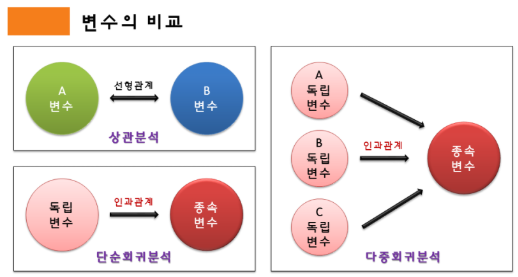



---



## [다중 회귀 모델 훈련하기](https://)


In [9]:
from sklearn.linear_model import LinearRegression #LinearRegression - 연속적인 타깃을 예측하는 알고리즘
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))  #특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있음

0.9903183436982125


In [10]:
#테스트 세트에 대한 점수 확인
print(lr.score(test_poly, test_target)) # 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더 이상 나타나지 않음

0.9714559911594111


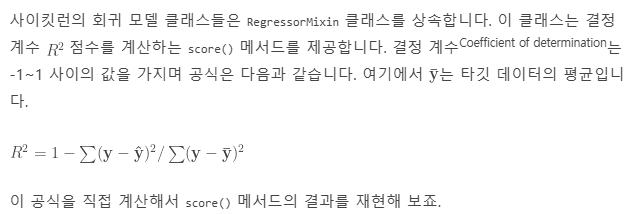

In [11]:
y_pred = lr.predict(test_poly)
r2 = 1 - ((test_target - y_pred)**2).sum() / ((test_target - test_target.mean())**2).sum()
print(r2)

0.9714559911594111




---



## [특성을 더 많이 추가하면 어떨까요? ](https://)


In [12]:
poly = PolynomialFeatures(degree=5, include_bias=False)
#poly = PolynomialFeatures(degree=8, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) #만들어진 특성의 개수가 무려 55개(train_poly 배열의 열의 개수가 특성의 개수)

(42, 55)


In [13]:
lr.fit(train_poly, train_target)
print("훈련 데이터 세트에 대한 점수 =", lr.score(train_poly, train_target))

훈련 데이터 세트에 대한 점수 = 0.9999999999996433


In [14]:
print("데스트 데이터 세트에 대한 점수 =", lr.score(test_poly, test_target))
#특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐
#훈련 세트에 대해 거의 완벽하게 학습할 수 있음
#훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만듬

데스트 데이터 세트에 대한 점수 = -144.40579436844948




---



# [규제(regularization)](https://)
- 머신러닝 모델이 훈련 세트를 [너무 과도하게 학습하지 못하도록](https://) 훼방하는 것
- 모델이 [훈련 세트에 과대적합되지 않도록](https://) 만드는 것
- 선형 회귀 모델의 경우 [특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일](https://)


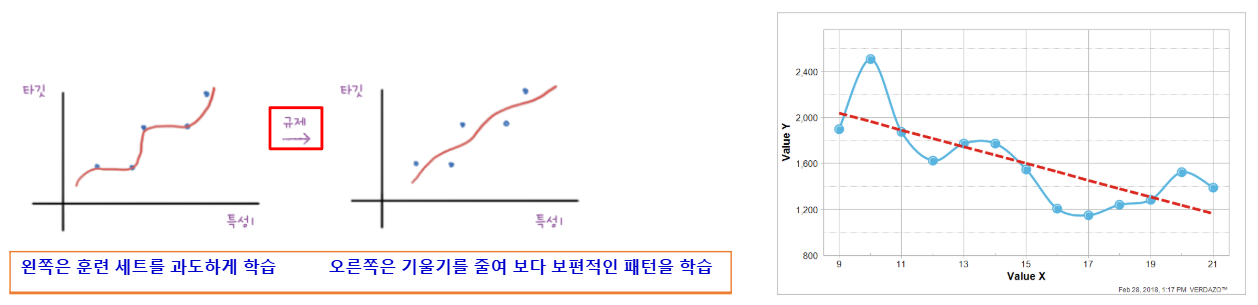



---



## [특성의 스케일 정규화하기(이유)](https://)
- 특성에 곱해지는 [계수 값의 차이를 줄임](https://)
- 선형 회귀 모델에 규제를 적용할 때 [계수 값의 크기가 서로 많이 다르면
공정하게 제어될 수 있기 위함](https://)

In [15]:
#StandardScaler 클래스(변환기) - 평균과 표준편차를 구해 특성을 표준점수로 바꾸어줌
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(train_scaled)
print(test_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

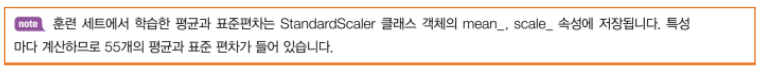

In [16]:
print(ss.mean_)
print(ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03]
[8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275



---



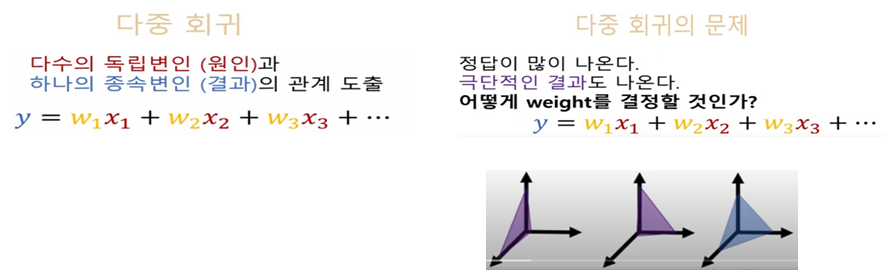

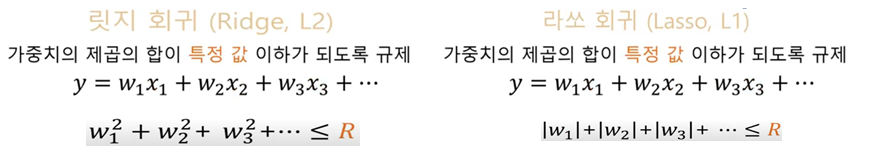

## [릿지 회귀](https://)
- 계수를 [제곱한 값을 기준으로 ](https://)규제를 적용하기(계수의 크기를 줄임)
- 일반적으로 릿지를 조금 더 선호함


In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target)) #점수가 조금 낮아짐(0.9999999999991098)

0.9896101671037343


In [28]:
print(ridge.score(test_scaled, test_target)) #테스트 세트 점수는 정상으로 돌아옴(-144.40579242684848)

0.9827976465386928




---



## [규제의 양을 조절하기](https://)
- [적절한 alpha 값을 찾기](https://) - alpha 값에 대한 R2값(회귀식이 얼마나 정확한지를 나타내는 정도)의 그래프를 그려 보는 것
- [훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨](https://)


In [32]:
import matplotlib.pyplot as plt
#alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만듬
train_score = []
test_score = []

#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음
#훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델을 만듭
    ridge = Ridge(alpha=alpha)

    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

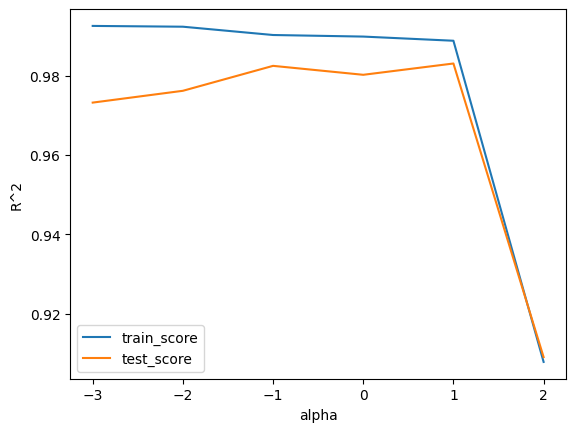

In [41]:
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

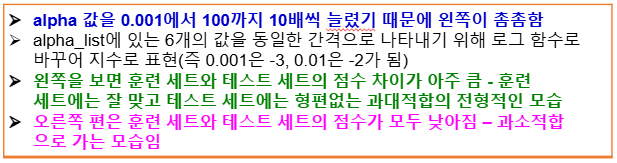



---



## [alpha 값 (10-1=0.1)로 최종 모델 훈련하기](https://)


In [34]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고
#과대적합과 과소적합 사이에서 균형을 맞추고 있음

0.9903815817570367
0.9827976465386928




---



## [라쏘 회귀](https://)
- [계수의 절댓값을 기준으로 규제를 적용](https://)
>- 계수의 크기를 줄이지만 라쏘는 [아예 0으로 만들 수도 있음](https://)


In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) #과대적합이 잘 억제됨

0.989789897208096


In [36]:
print(lasso.score(test_scaled, test_target)) #테스트 세트의 점수도 릿지만큼 아주 좋음

0.9800593698421883




---



## [alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수 계산하기](https://)


In [37]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듬
    # max_iter - the maximum number of iterations
        lasso = Lasso(alpha=alpha, max_iter=10000)

    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

## [train_score와 test_score 리스트를 사용해 그래프 그리기](https://)
- x축을 [로그 스케일로](https://)(매우 광범위한 범위의 수치 데이터를 로그를 이용하여 간결하게 표시하는 눈금의 일종) 변환함


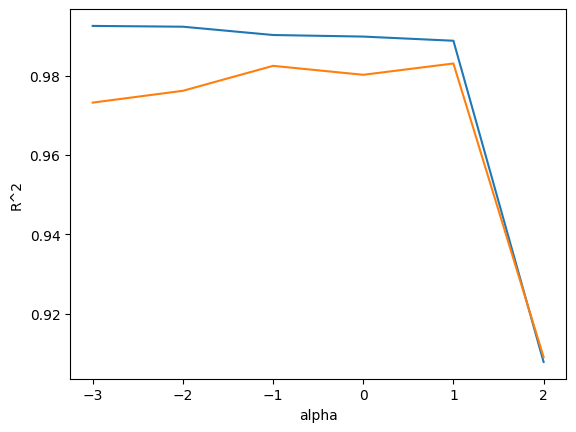

In [38]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

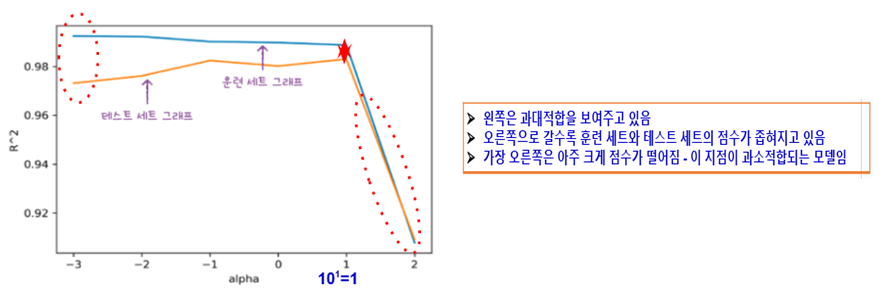



---



## [alpha 값(101=1)로 최종 모델 훈련하기](https://)


In [39]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))  #과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였음

0.9888067471131867
0.9824470598706695


In [40]:
#라쏘 모델은 계수 값을 0으로 만들 수 있음
#라쏘 모델의 계수는 coef_ 속성에 저장되어 있음

#55개의 특성 중 40개의 계수가 0이 되어 라쏘 모델이 사용한 특성은 15개 밖에 되지 않음
#이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음
print(np.sum(lasso.coef_ == 0))

40
